# Tutorial: How to resample time-series data

Time-series data is recorded continuously, but classification of the data is done in windows of data. For example, you may look at 10 seconds of an accelerometer data to determine whether you are walking or standing still. Resampling allows splitting data into such shorter time windows.

In this tutorial, we will learn how to:

* Generate sample time-series data
* Resample the data into larger windows
* Compute statistics on the resampled windows

This technique is useful for feature extraction from time-series data for tasks like classification that you will have to do in your assignment.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generating Sample Data

We first need some sample time-series data. Let's generate a two week temperature dataset sampled at 10 Hz (10 samples per second):

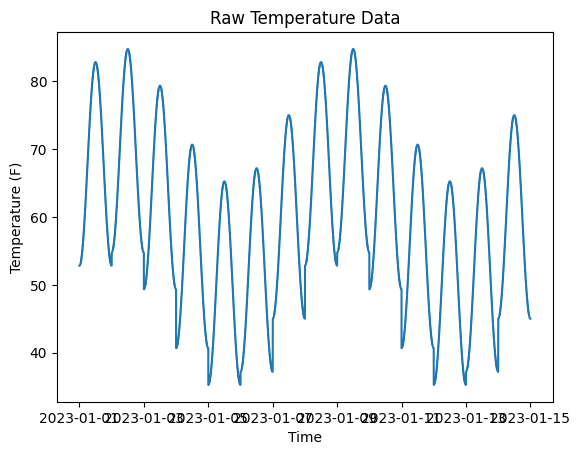

In [2]:
# Create 10Hz data over 14 days 
timesteps = 14*24*60*60*10
dates = pd.date_range('2023-01-01', periods=timesteps, freq='100L')

# Daily variation  
hour = dates.hour + dates.minute/60 
daily_var = (np.sin(2*np.pi*(hour-6)/24) + 1)* 15   # 15 degree swing

# Weekly variation
weekly_var = np.sin(2*np.pi*dates.day/7) * 10

# Overall range 
min_temp = 45 + weekly_var
max_temp = 80 + weekly_var 

# Generate data
data = {'temp': min_temp + daily_var}

df = pd.DataFrame(data=data, index=dates)

# Plot the raw data
plt.plot(df)
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.title('Raw Temperature Data')
plt.show()

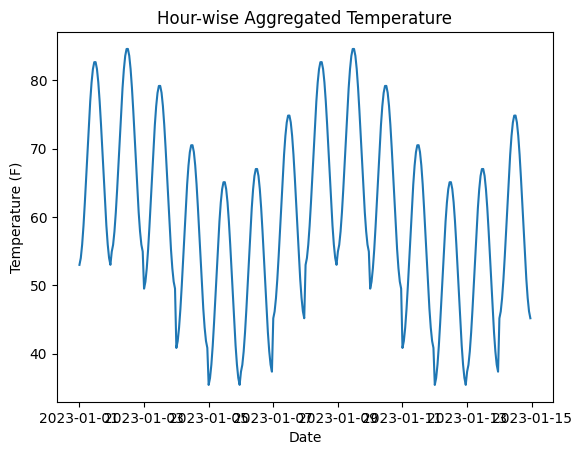

In [3]:
# Resample to 1 hour intervals and aggregate  
df_hour = pd.DataFrame()

for t,w in df.resample(f"1H"):
    frame = {}
    frame['time'] = t
    frame['avg'] = w['temp'].mean()
    frame['std'] = w['temp'].std()
    df_hour = df_hour.append(frame,ignore_index=True)

# # Plot the daily aggregated data
plt.plot(df_hour['time'], df_hour['avg'])
plt.title('Hour-wise Aggregated Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()

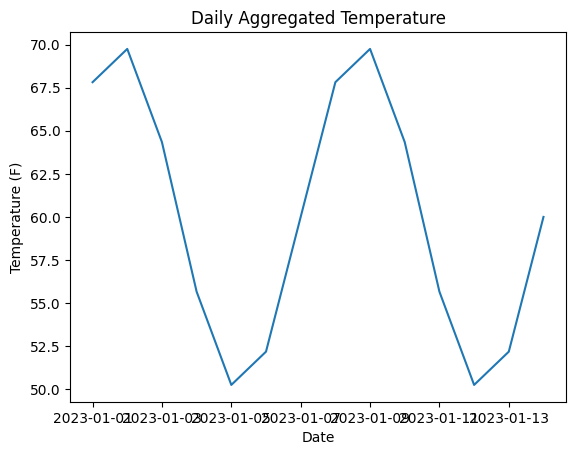

In [4]:
# Resample to 1 day intervals and aggregate  
df_day = pd.DataFrame()

for t,w in df.resample(f"1D"):
    frame = {}
    frame['time'] = t
    frame['avg'] = w['temp'].mean()
    frame['std'] = w['temp'].std()
    df_day = df_day.append(frame,ignore_index=True)

# # Plot the daily aggregated data
plt.plot(df_day['time'], df_day['avg'])
plt.title('Daily Aggregated Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()